# Matplotlib Tutorial Part 12 - Styles

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import urllib
import numpy as np

## Getting and Cleaning Data

In [2]:
stock = "EBAY"

# Not needed in Python2.7
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

# Yahoo Finance API
stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' +stock+ '/chartdata;type=quote;range=1m/csv'

# Getting Data from Yahoo Finance API
source_code = urllib.request.urlopen(stock_price_url).read().decode()

# Cleaning Data
stock_data = []  
split_source = source_code.split('\n')

for line in split_source:
    split_line = line.split(',')
    if len(split_line) == 6:
        if 'values' not in line and 'labels' not in line:
            stock_data.append(line)

# Unpacking Data
date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                      delimiter=',',
                                                      unpack=True,
                                                      converters={0: bytespdate2num('%Y%m%d')})    

## Making Sample Function

In [3]:
def plot_two_lines():
    fig = plt.figure(figsize=(17,9))
    
    ax1 = plt.subplot2grid((1,1),(0,0))

    ax1.plot(date,closep)
    ax1.plot(date,openp)
    
    # Rotate Labels
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    
    # Set Date Format
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    
    plt.show()

## Avaiable Styles

In [4]:
for i in sorted(plt.style.available):
    print(i)

bmh
classic
dark_background
fivethirtyeight
ggplot
grayscale
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid


## Line Graph Styled


bmh


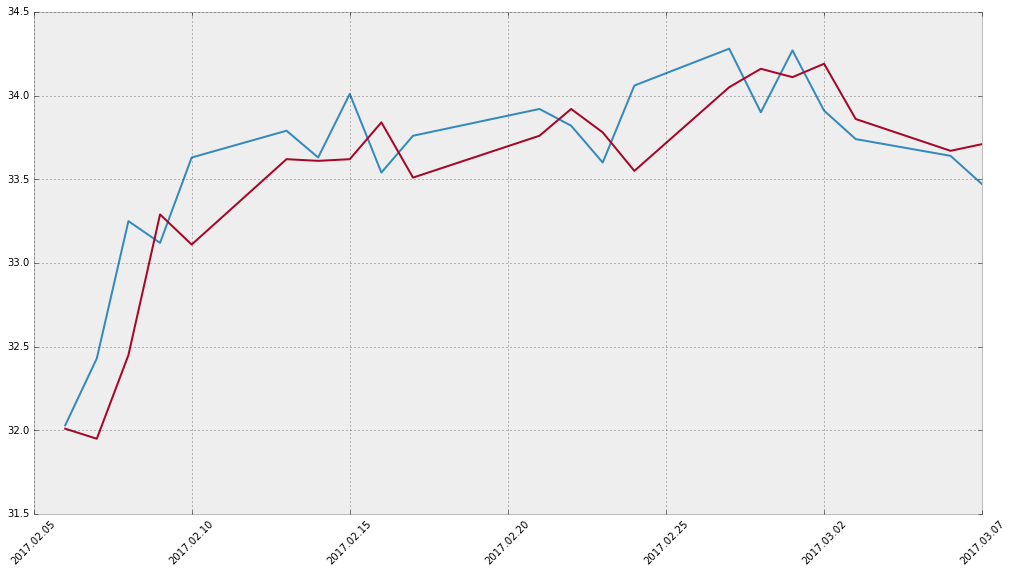


classic


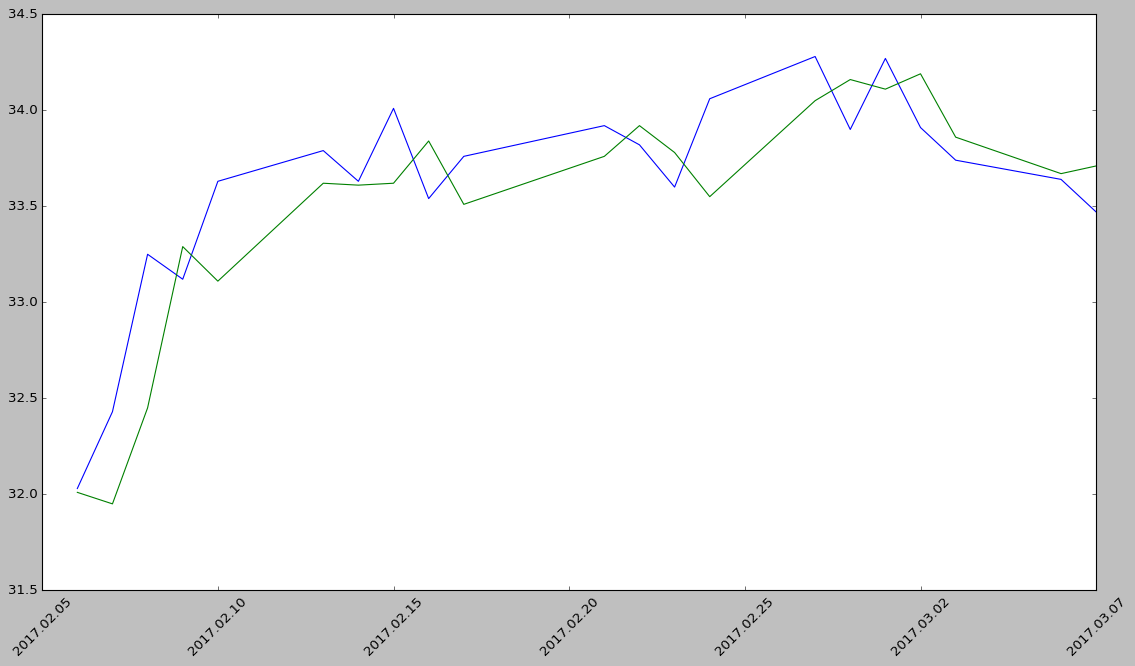


dark_background


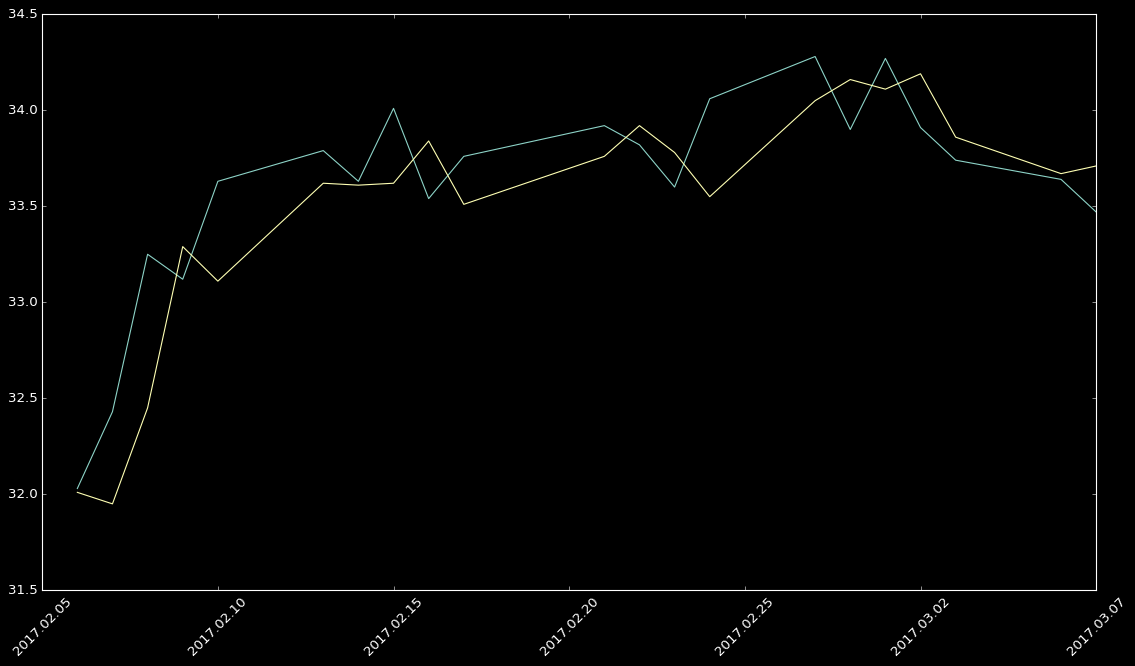


fivethirtyeight


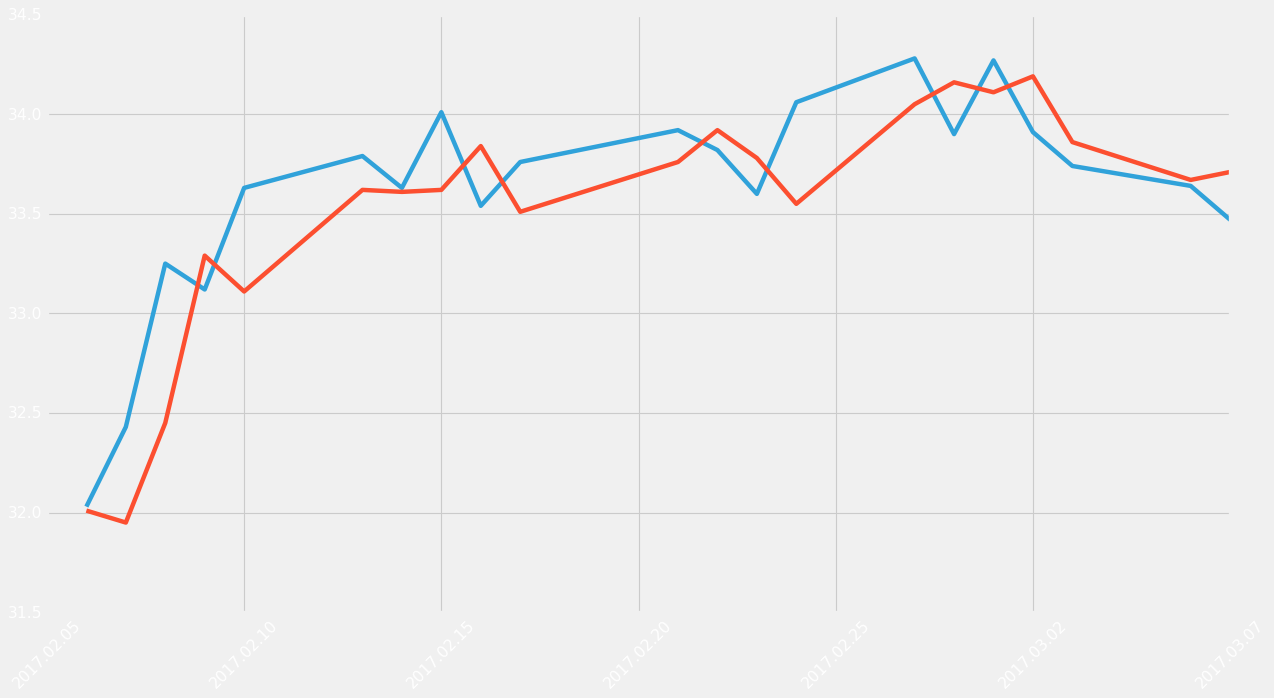


ggplot


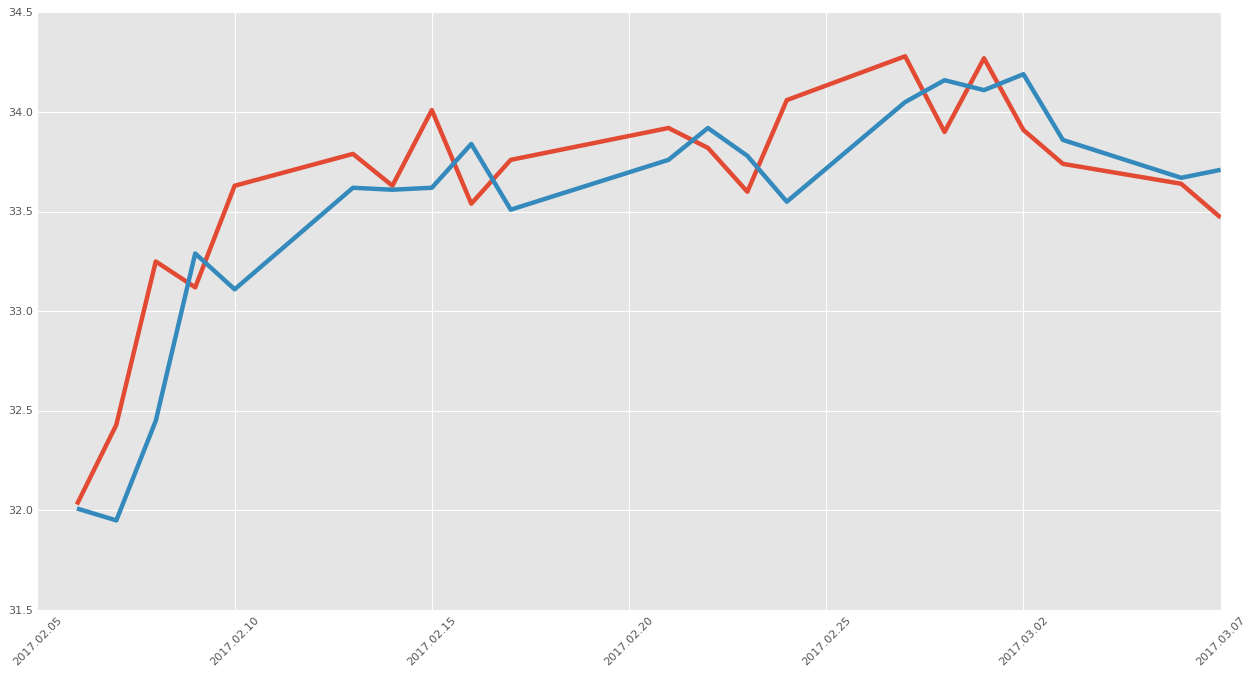


grayscale


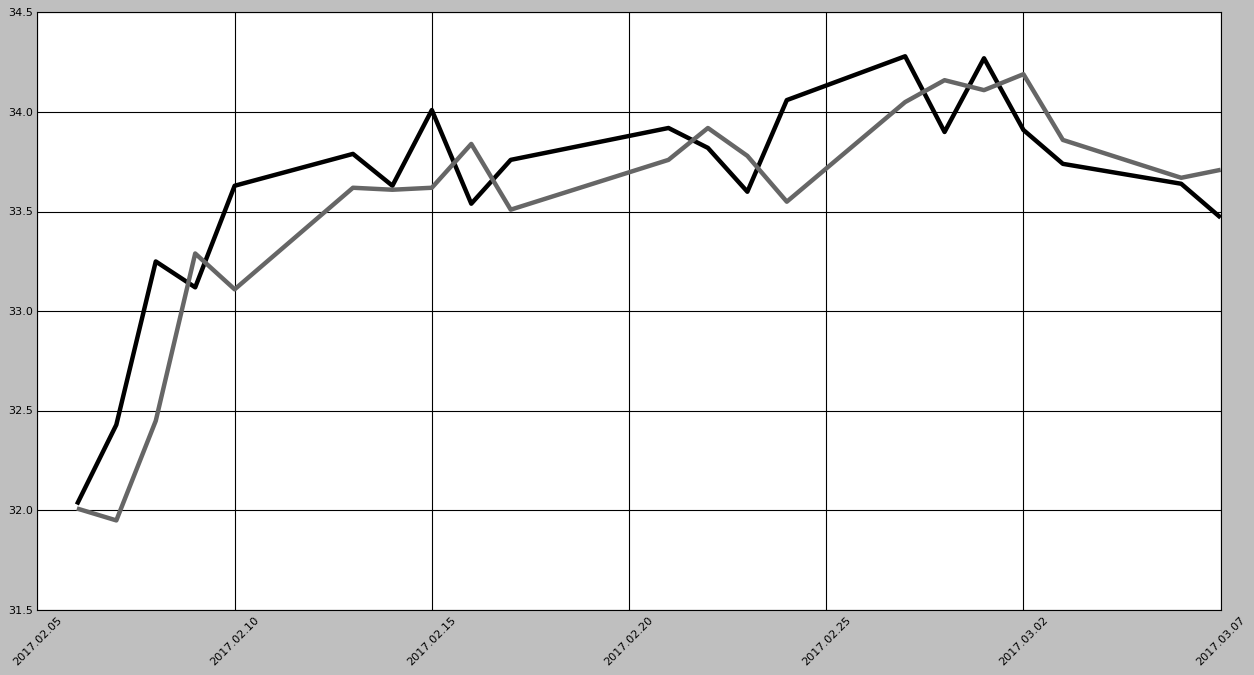


seaborn-bright


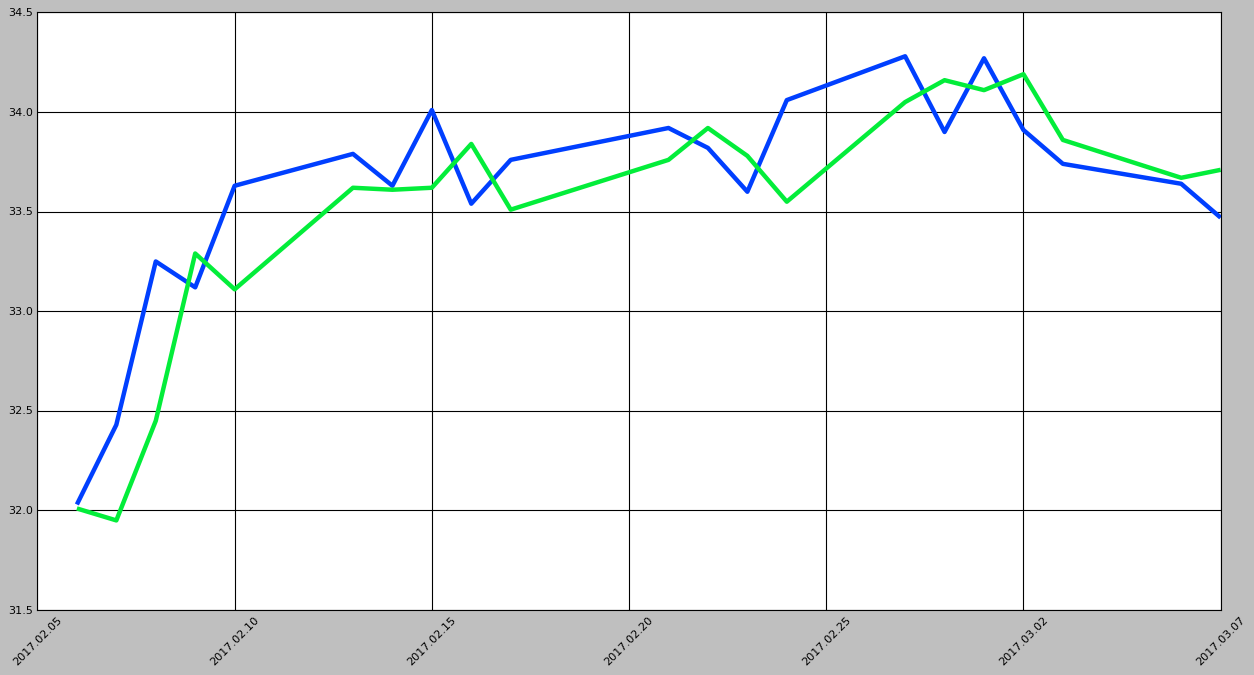


seaborn-colorblind


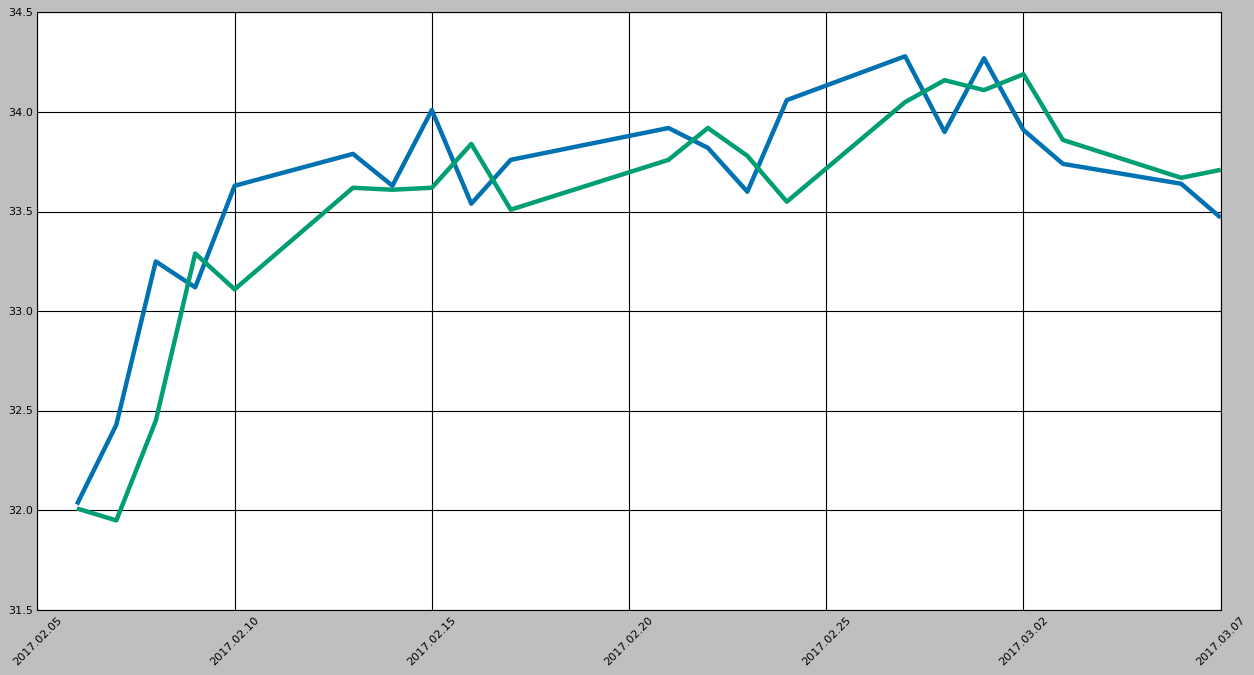


seaborn-dark


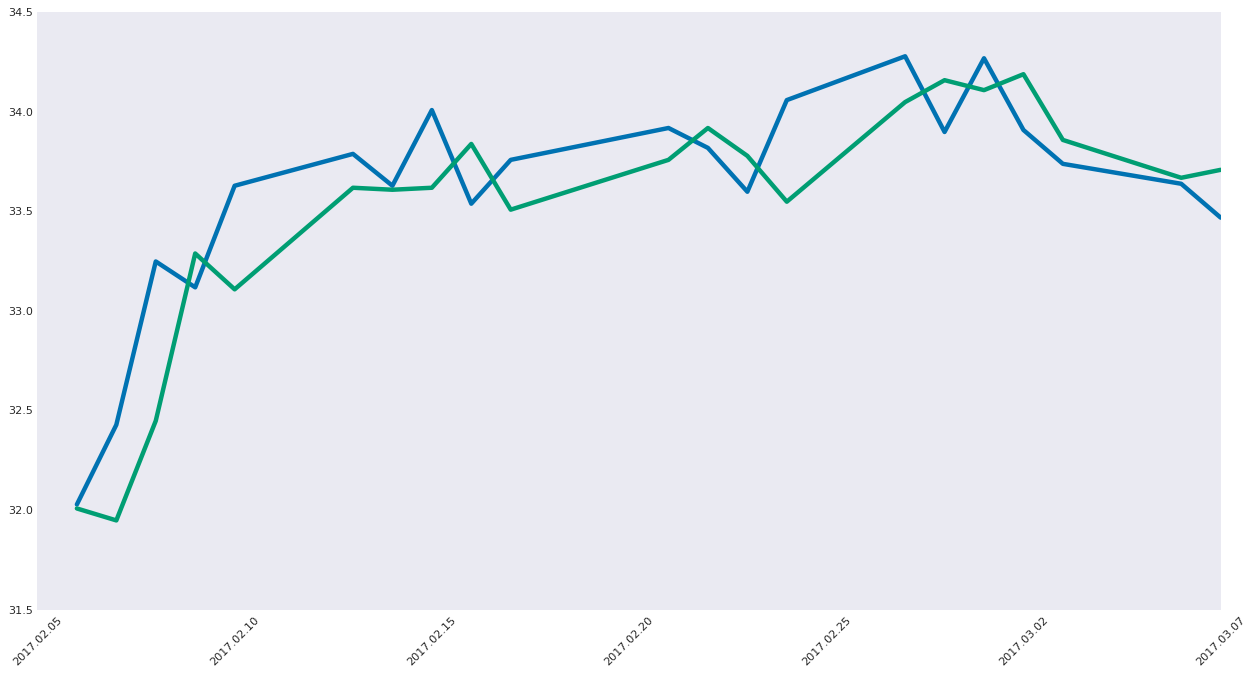


seaborn-dark-palette


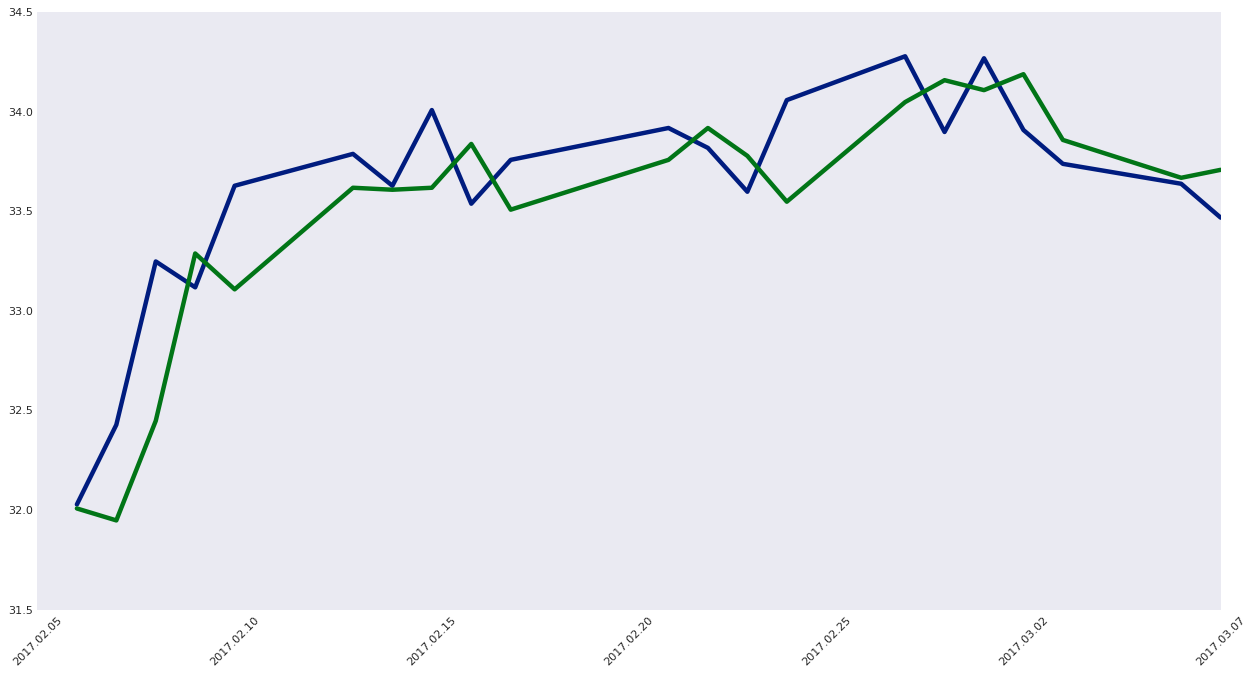


seaborn-darkgrid


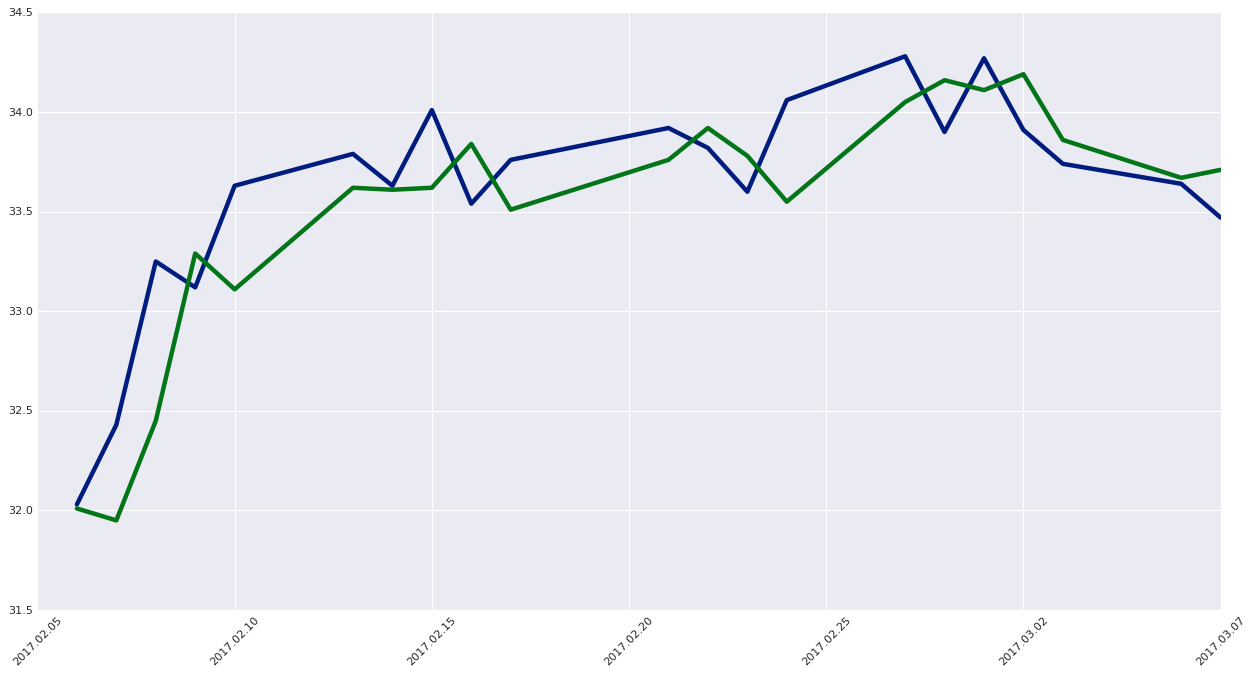


seaborn-deep


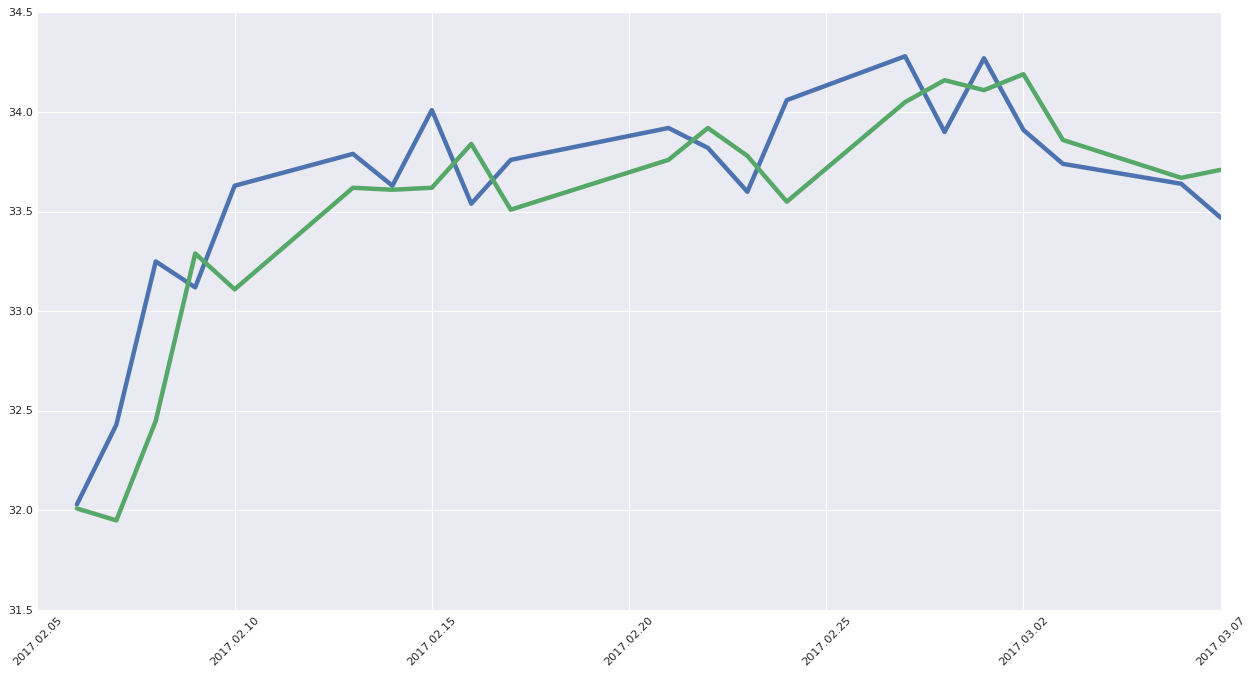


seaborn-muted


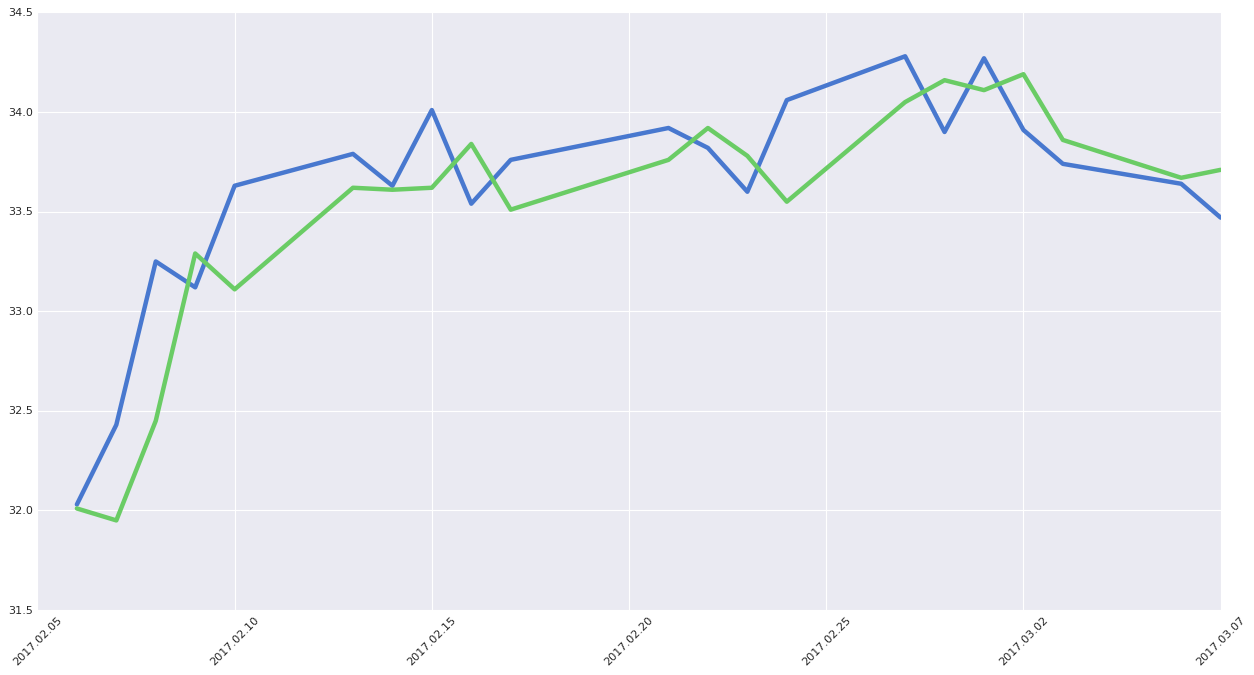


seaborn-notebook


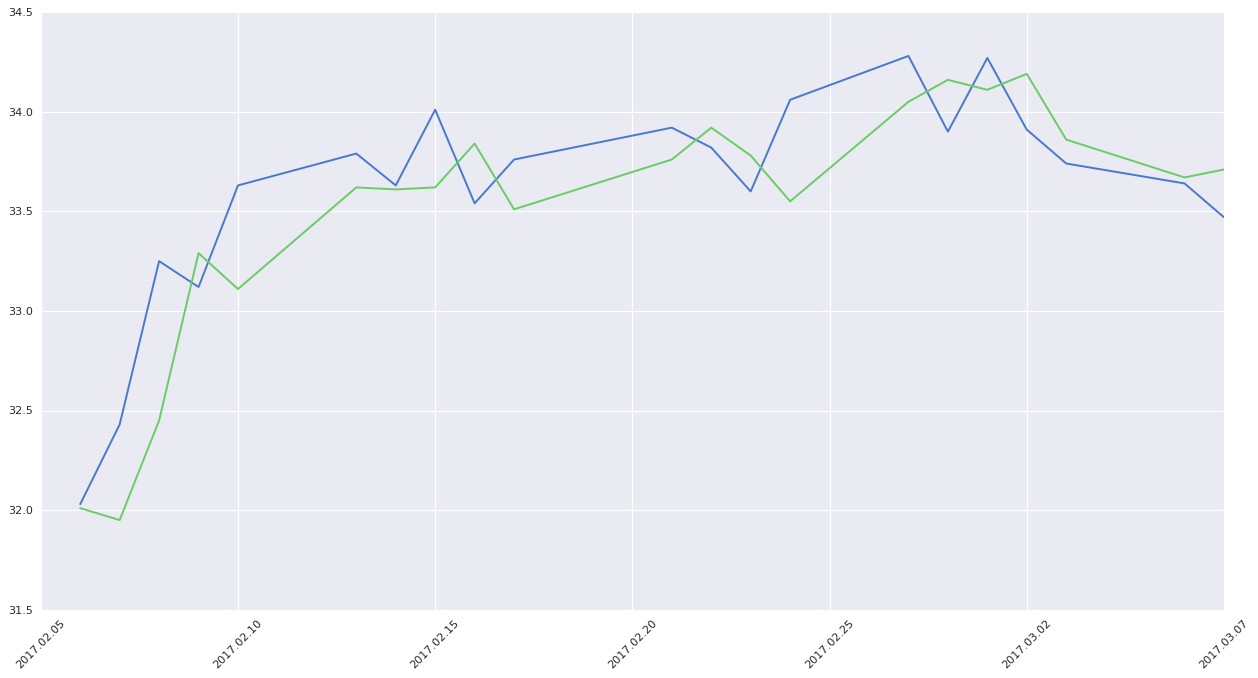


seaborn-paper


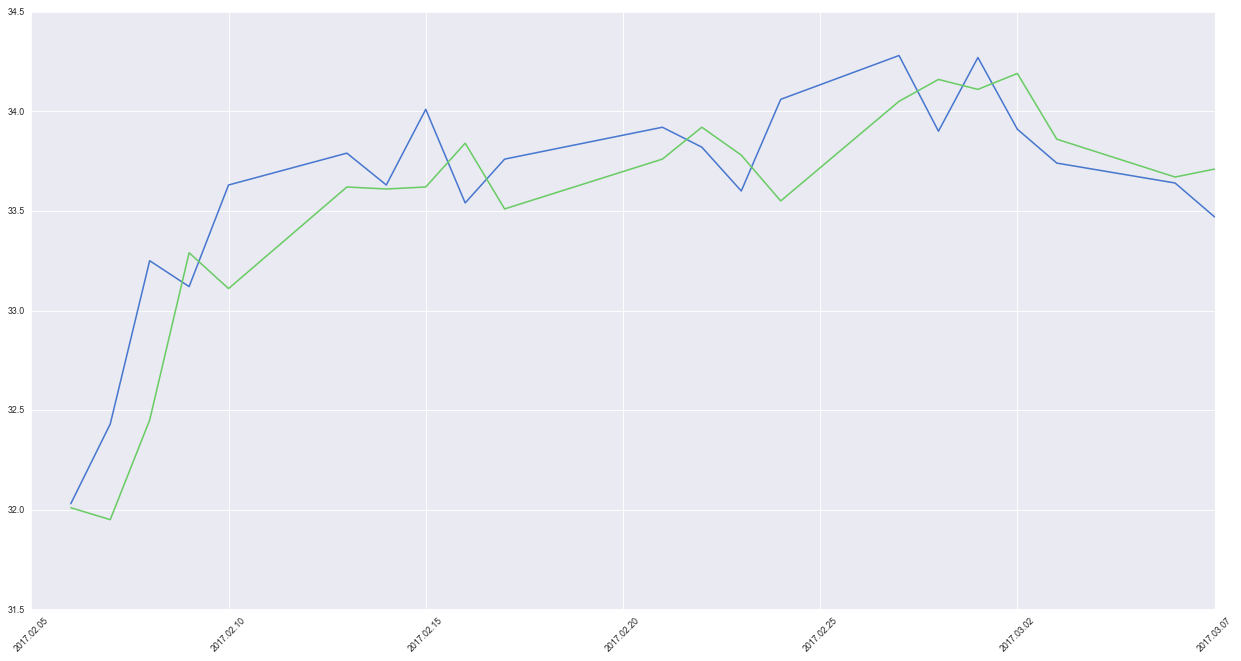


seaborn-pastel


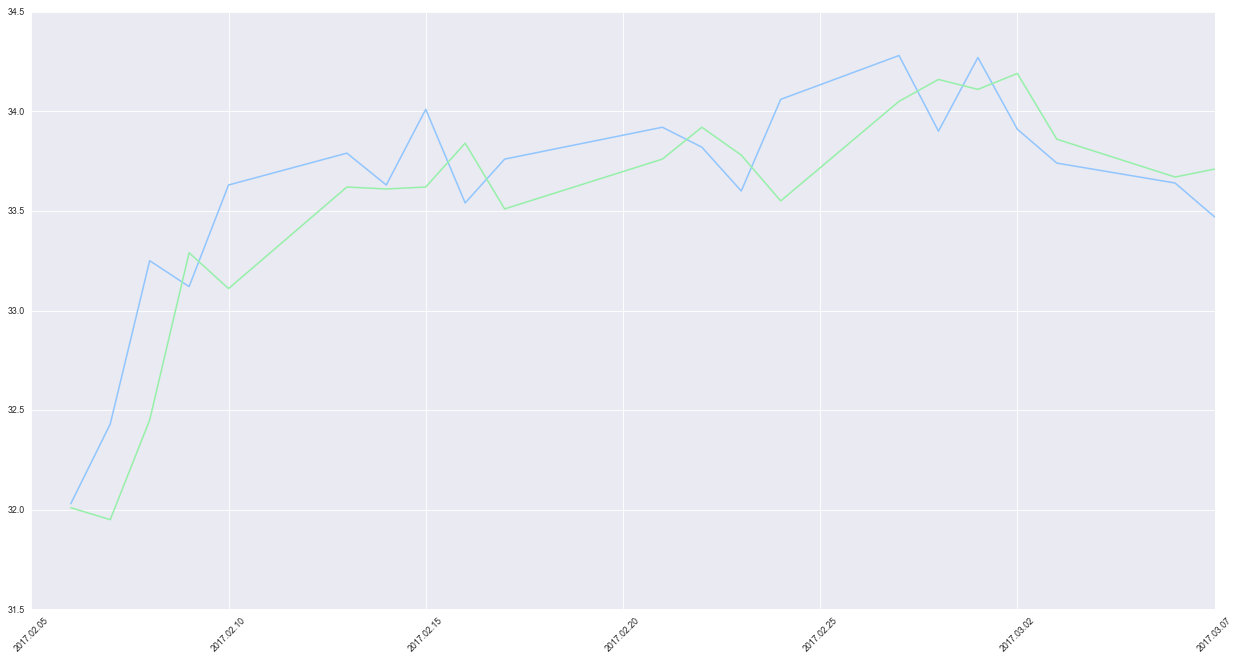


seaborn-poster


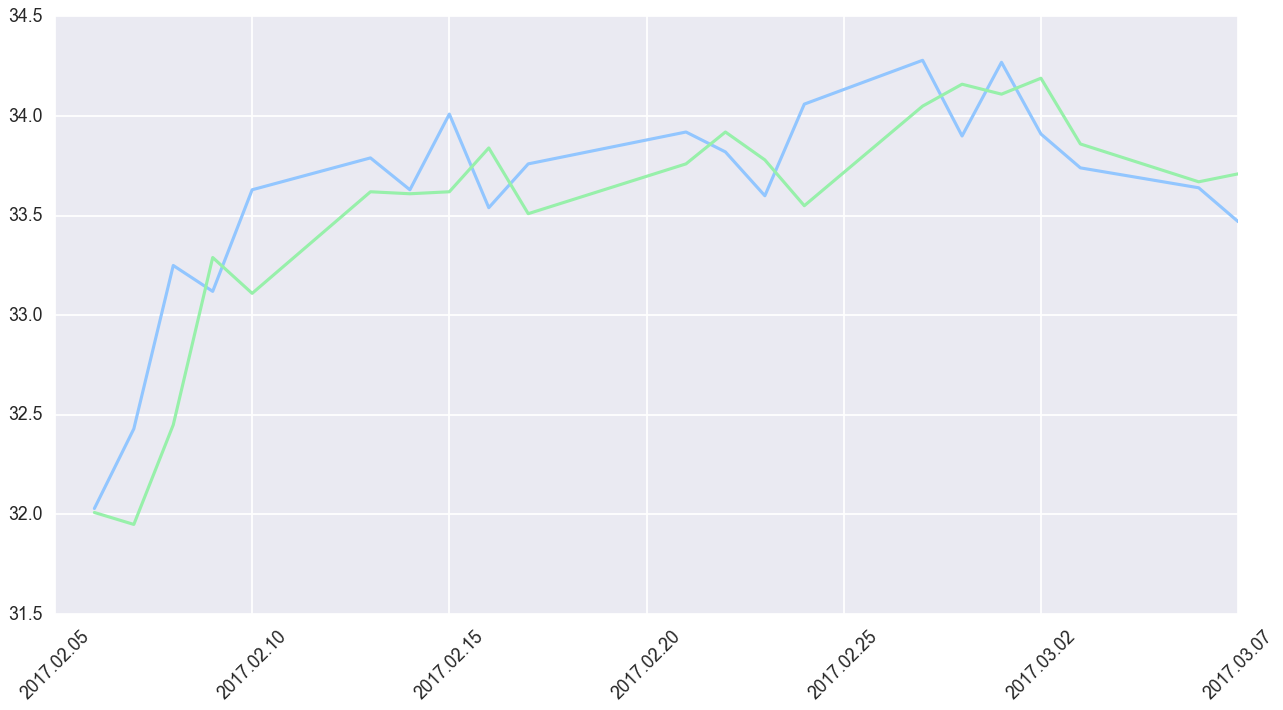


seaborn-talk


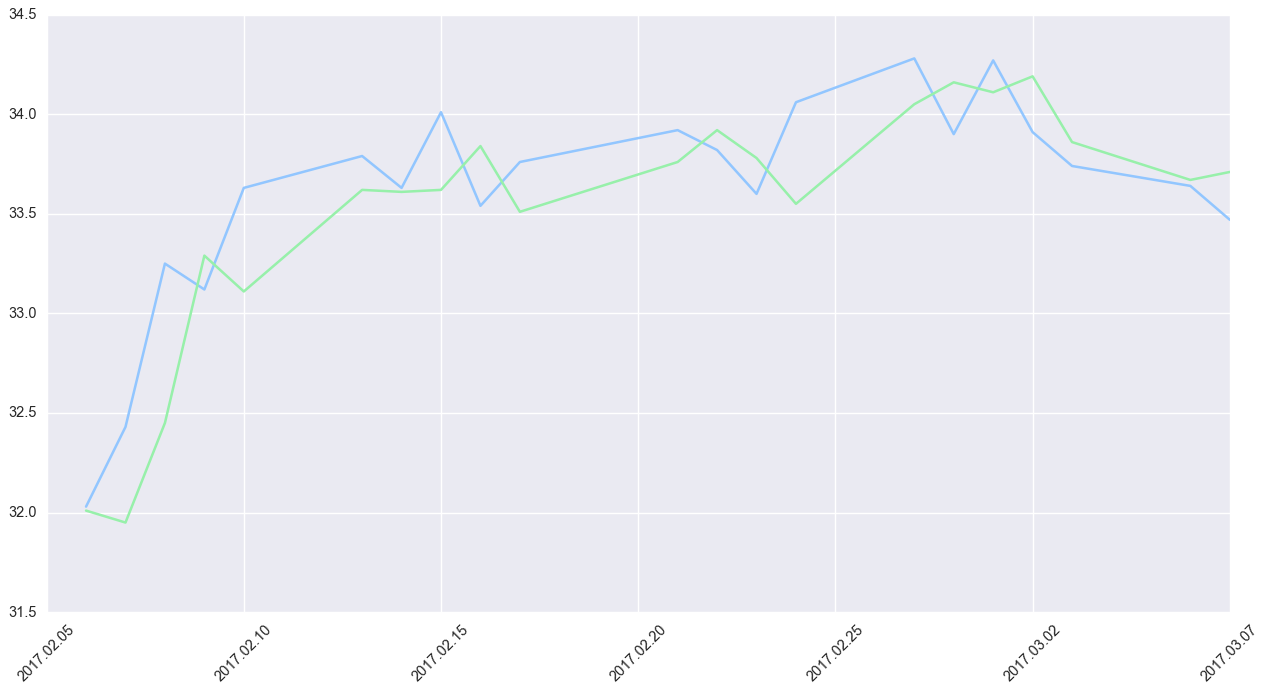


seaborn-ticks


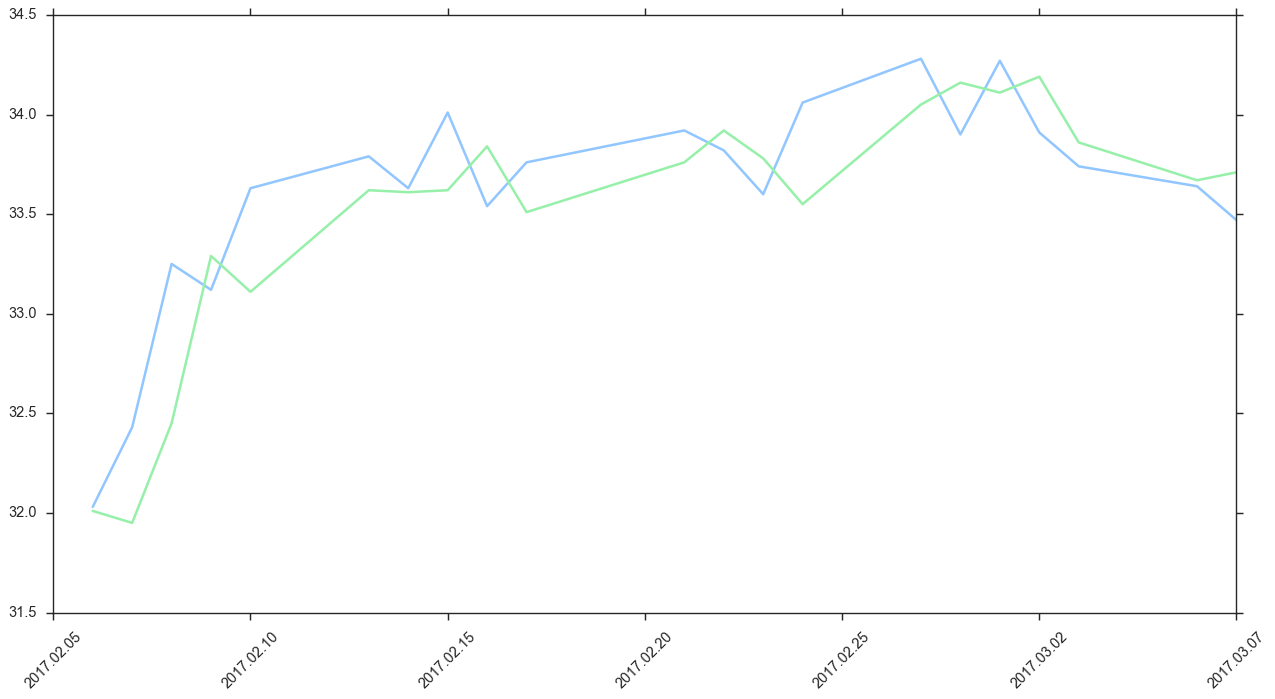


seaborn-white


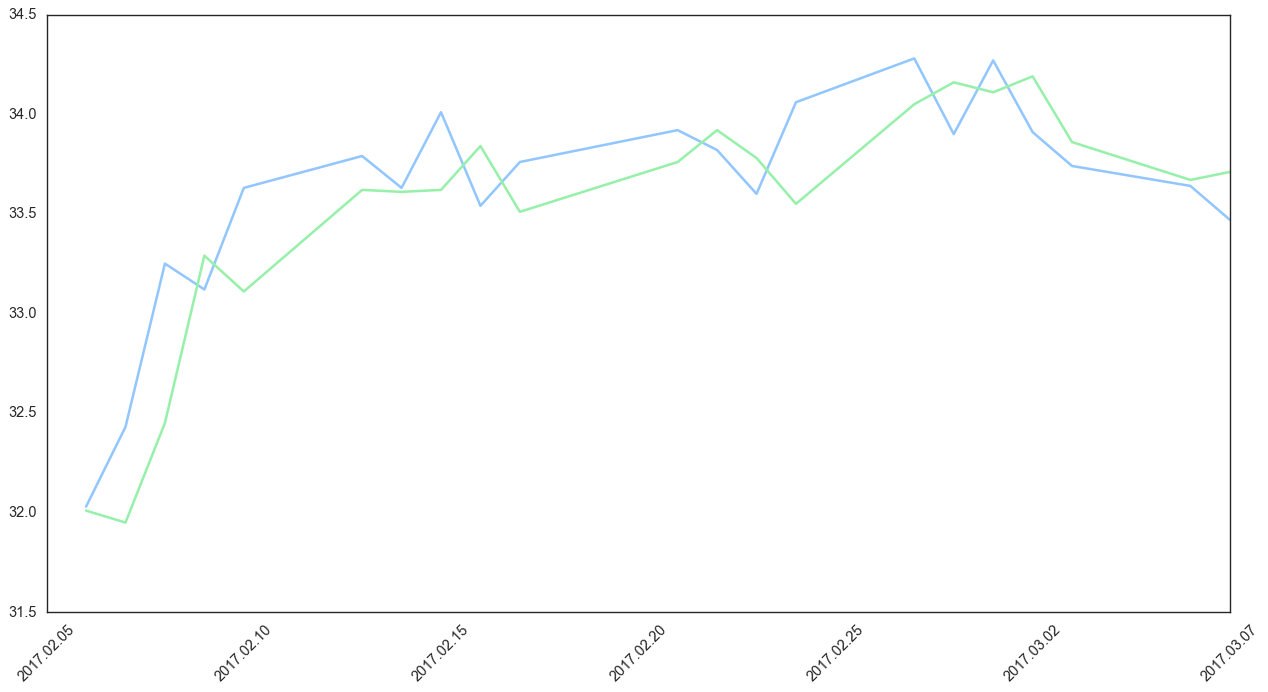


seaborn-whitegrid


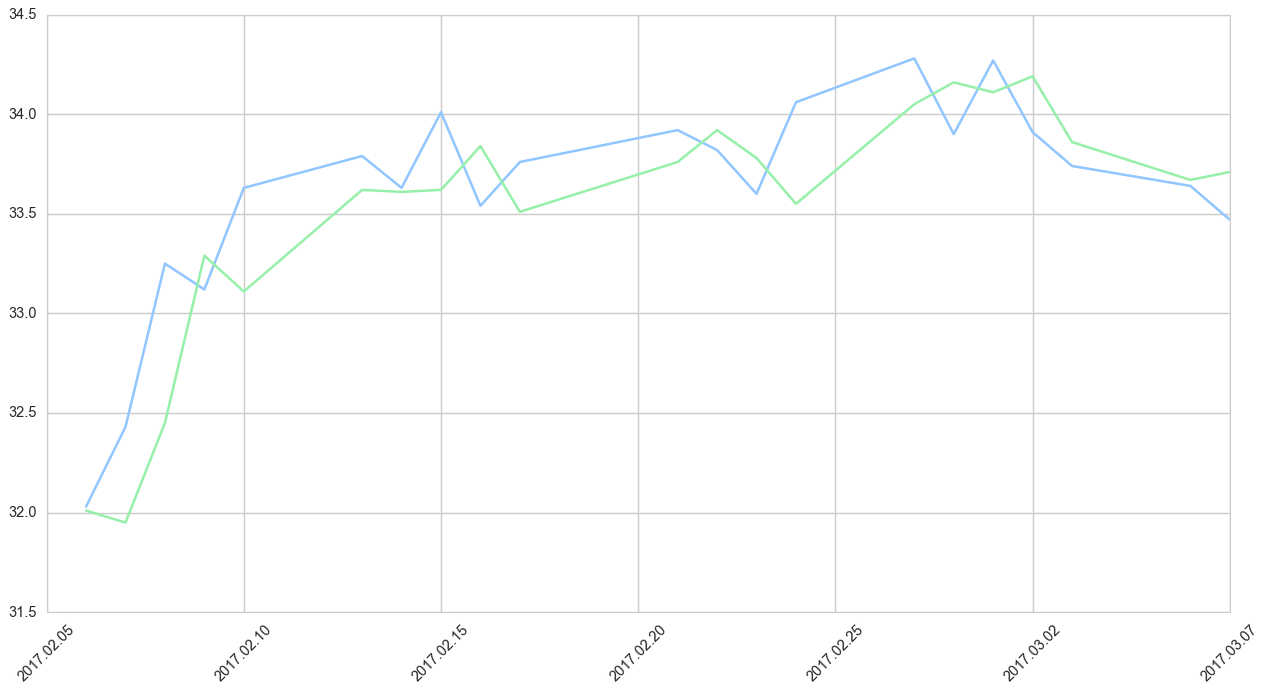

In [5]:
for sty in sorted(plt.style.available):
    print('\n'+sty)
    style.use(sty)
    plot_two_lines()